In [1]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import lightgbm as lgb
from lightgbm import *
import xgboost as xgb
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN 

seed = 123

col = [
    "left_palm_position_x",
"left_palm_position_y",
"left_palm_position_z",
"left_palm_normal_x",
"left_palm_normal_y",
"left_palm_normal_z",
"left_hand_direction_x",
"left_hand_direction_y",
"left_hand_direction_z",
"left_palm_velocity_x",
"left_palm_velocity_y",
"left_palm_velocity_z",
"left_hand_pitch",
"left_hand_roll",
"left_hand_yaw",
"left_arm_direction_x",
"left_arm_direction_y",
"left_arm_direction_z",
"left_wrist_position_x",
"left_wrist_position_y",
"left_wrist_position_z",
"left_elbow_position_x",
"left_elbow_position_y",
"left_elbow_position_z",
"left_thumb_length",
"left_thumb_width",
"left_thumb_metacarpal_start_x",
"left_thumb_metacarpal_start_y",
"left_thumb_metacarpal_start_z",
"left_thumb_metacarpal_end_x",
"left_thumb_metacarpal_end_y",
"left_thumb_metacarpal_end_z",
"left_thumb_metacarpal_direction_x",
"left_thumb_metacarpal_direction_y",
"left_thumb_metacarpal_direction_z",
"left_thumb_proximal_start_x",
"left_thumb_proximal_start_y",
"left_thumb_proximal_start_z",
"left_thumb_proximal_end_x",
"left_thumb_proximal_end_y",
"left_thumb_proximal_end_z",
"left_thumb_proximal_direction_x",
"left_thumb_proximal_direction_y",
"left_thumb_proximal_direction_z",
"left_thumb_intermediate_start_x",
"left_thumb_intermediate_start_y",
"left_thumb_intermediate_start_z",
"left_thumb_intermediate_end_x",
"left_thumb_intermediate_end_y",
"left_thumb_intermediate_end_z",
"left_thumb_intermediate_direction_x",
"left_thumb_intermediate_direction_y",
"left_thumb_intermediate_direction_z",
"left_thumb_distal_start_x",
"left_thumb_distal_start_y",
"left_thumb_distal_start_z",
"left_thumb_distal_end_x",
"left_thumb_distal_end_y",
"left_thumb_distal_end_z",
"left_thumb_distal_direction_x",
"left_thumb_distal_direction_y",
"left_thumb_distal_direction_z",
"left_index_length",
"left_index_width",
"left_index_metacarpal_start_x",
"left_index_metacarpal_start_y",
"left_index_metacarpal_start_z",
"left_index_metacarpal_end_x",
"left_index_metacarpal_end_y",
"left_index_metacarpal_end_z",
"left_index_metacarpal_direction_x",
"left_index_metacarpal_direction_y",
"left_index_metacarpal_direction_z",
"left_index_proximal_start_x",
"left_index_proximal_start_y",
"left_index_proximal_start_z",
"left_index_proximal_end_x",
"left_index_proximal_end_y",
"left_index_proximal_end_z",
"left_index_proximal_direction_x",
"left_index_proximal_direction_y",
"left_index_proximal_direction_z",
"left_index_intermediate_start_x",
"left_index_intermediate_start_y",
"left_index_intermediate_start_z",
"left_index_intermediate_end_x",
"left_index_intermediate_end_y",
"left_index_intermediate_end_z",
"left_index_intermediate_direction_x",
"left_index_intermediate_direction_y",
"left_index_intermediate_direction_z",
"left_index_distal_start_x",
"left_index_distal_start_y",
"left_index_distal_start_z",
"left_index_distal_end_x",
"left_index_distal_end_y",
"left_index_distal_end_z",
"left_index_distal_direction_x",
"left_index_distal_direction_y",
"left_index_distal_direction_z",
"left_middle_length",
"left_middle_width",
"left_middle_metacarpal_start_x",
"left_middle_metacarpal_start_y",
"left_middle_metacarpal_start_z",
"left_middle_metacarpal_end_x",
"left_middle_metacarpal_end_y",
"left_middle_metacarpal_end_z",
"left_middle_metacarpal_direction_x",
"left_middle_metacarpal_direction_y",
"left_middle_metacarpal_direction_z",
"left_middle_proximal_start_x",
"left_middle_proximal_start_y",
"left_middle_proximal_start_z",
"left_middle_proximal_end_x",
"left_middle_proximal_end_y",
"left_middle_proximal_end_z",
"left_middle_proximal_direction_x",
"left_middle_proximal_direction_y",
"left_middle_proximal_direction_z",
"left_middle_intermediate_start_x",
"left_middle_intermediate_start_y",
"left_middle_intermediate_start_z",
"left_middle_intermediate_end_x",
"left_middle_intermediate_end_y",
"left_middle_intermediate_end_z",
"left_middle_intermediate_direction_x",
"left_middle_intermediate_direction_y",
"left_middle_intermediate_direction_z",
"left_middle_distal_start_x",
"left_middle_distal_start_y",
"left_middle_distal_start_z",
"left_middle_distal_end_x",
"left_middle_distal_end_y",
"left_middle_distal_end_z",
"left_middle_distal_direction_x",
"left_middle_distal_direction_y",
"left_middle_distal_direction_z",
"left_ring_length",
"left_ring_width",
"left_ring_metacarpal_start_x",
"left_ring_metacarpal_start_y",
"left_ring_metacarpal_start_z",
"left_ring_metacarpal_end_x",
"left_ring_metacarpal_end_y",
"left_ring_metacarpal_end_z",
"left_ring_metacarpal_direction_x",
"left_ring_metacarpal_direction_y",
"left_ring_metacarpal_direction_z",
"left_ring_proximal_start_x",
"left_ring_proximal_start_y",
"left_ring_proximal_start_z",
"left_ring_proximal_end_x",
"left_ring_proximal_end_y",
"left_ring_proximal_end_z",
"left_ring_proximal_direction_x",
"left_ring_proximal_direction_y",
"left_ring_proximal_direction_z",
"left_ring_intermediate_start_x",
"left_ring_intermediate_start_y",
"left_ring_intermediate_start_z",
"left_ring_intermediate_end_x",
"left_ring_intermediate_end_y",
"left_ring_intermediate_end_z",
"left_ring_intermediate_direction_x",
"left_ring_intermediate_direction_y",
"left_ring_intermediate_direction_z",
"left_ring_distal_start_x",
"left_ring_distal_start_y",
"left_ring_distal_start_z",
"left_ring_distal_end_x",
"left_ring_distal_end_y",
"left_ring_distal_end_z",
"left_ring_distal_direction_x",
"left_ring_distal_direction_y",
"left_ring_distal_direction_z",
"left_pinky_length",
"left_pinky_width",
"left_pinky_metacarpal_start_x",
"left_pinky_metacarpal_start_y",
"left_pinky_metacarpal_start_z",
"left_pinky_metacarpal_end_x",
"left_pinky_metacarpal_end_y",
"left_pinky_metacarpal_end_z",
"left_pinky_metacarpal_direction_x",
"left_pinky_metacarpal_direction_y",
"left_pinky_metacarpal_direction_z",
"left_pinky_proximal_start_x",
"left_pinky_proximal_start_y",
"left_pinky_proximal_start_z",
"left_pinky_proximal_end_x",
"left_pinky_proximal_end_y",
"left_pinky_proximal_end_z",
"left_pinky_proximal_direction_x",
"left_pinky_proximal_direction_y",
"left_pinky_proximal_direction_z",
"left_pinky_intermediate_start_x",
"left_pinky_intermediate_start_y",
"left_pinky_intermediate_start_z",
"left_pinky_intermediate_end_x",
"left_pinky_intermediate_end_y",
"left_pinky_intermediate_end_z",
"left_pinky_intermediate_direction_x",
"left_pinky_intermediate_direction_y",
"left_pinky_intermediate_direction_z",
"left_pinky_distal_start_x",
"left_pinky_distal_start_y",
"left_pinky_distal_start_z",
"left_pinky_distal_end_x",
"left_pinky_distal_end_y",
"left_pinky_distal_end_z",
"left_pinky_distal_direction_x",
"left_pinky_distal_direction_y",
"left_pinky_distal_direction_z",
"right_palm_position_x",
"right_palm_position_y",
"right_palm_position_z",
"right_palm_normal_x",
"right_palm_normal_y",
"right_palm_normal_z",
"right_hand_direction_x",
"right_hand_direction_y",
"right_hand_direction_z",
"right_palm_velocity_x",
"right_palm_velocity_y",
"right_palm_velocity_z",
"right_hand_pitch",
"right_hand_roll",
"right_hand_yaw",
"right_arm_direction_x",
"right_arm_direction_y",
"right_arm_direction_z",
"right_wrist_position_x",
"right_wrist_position_y",
"right_wrist_position_z",
"right_elbow_position_x",
"right_elbow_position_y",
"right_elbow_position_z",
"right_thumb_length",
"right_thumb_width",
"right_thumb_metacarpal_start_x",
"right_thumb_metacarpal_start_y",
"right_thumb_metacarpal_start_z",
"right_thumb_metacarpal_end_x",
"right_thumb_metacarpal_end_y",
"right_thumb_metacarpal_end_z",
"right_thumb_metacarpal_direction_x",
"right_thumb_metacarpal_direction_y",
"right_thumb_metacarpal_direction_z",
"right_thumb_proximal_start_x",
"right_thumb_proximal_start_y",
"right_thumb_proximal_start_z",
"right_thumb_proximal_end_x",
"right_thumb_proximal_end_y",
"right_thumb_proximal_end_z",
"right_thumb_proximal_direction_x",
"right_thumb_proximal_direction_y",
"right_thumb_proximal_direction_z",
"right_thumb_intermediate_start_x",
"right_thumb_intermediate_start_y",
"right_thumb_intermediate_start_z",
"right_thumb_intermediate_end_x",
"right_thumb_intermediate_end_y",
"right_thumb_intermediate_end_z",
"right_thumb_intermediate_direction_x",
"right_thumb_intermediate_direction_y",
"right_thumb_intermediate_direction_z",
"right_thumb_distal_start_x",
"right_thumb_distal_start_y",
"right_thumb_distal_start_z",
"right_thumb_distal_end_x",
"right_thumb_distal_end_y",
"right_thumb_distal_end_z",
"right_thumb_distal_direction_x",
"right_thumb_distal_direction_y",
"right_thumb_distal_direction_z",
"right_index_length",
"right_index_width",
"right_index_metacarpal_start_x",
"right_index_metacarpal_start_y",
"right_index_metacarpal_start_z",
"right_index_metacarpal_end_x",
"right_index_metacarpal_end_y",
"right_index_metacarpal_end_z",
"right_index_metacarpal_direction_x",
"right_index_metacarpal_direction_y",
"right_index_metacarpal_direction_z",
"right_index_proximal_start_x",
"right_index_proximal_start_y",
"right_index_proximal_start_z",
"right_index_proximal_end_x",
"right_index_proximal_end_y",
"right_index_proximal_end_z",
"right_index_proximal_direction_x",
"right_index_proximal_direction_y",
"right_index_proximal_direction_z",
"right_index_intermediate_start_x",
"right_index_intermediate_start_y",
"right_index_intermediate_start_z",
"right_index_intermediate_end_x",
"right_index_intermediate_end_y",
"right_index_intermediate_end_z",
"right_index_intermediate_direction_x",
"right_index_intermediate_direction_y",
"right_index_intermediate_direction_z",
"right_index_distal_start_x",
"right_index_distal_start_y",
"right_index_distal_start_z",
"right_index_distal_end_x",
"right_index_distal_end_y",
"right_index_distal_end_z",
"right_index_distal_direction_x",
"right_index_distal_direction_y",
"right_index_distal_direction_z",
"right_middle_length",
"right_middle_width",
"right_middle_metacarpal_start_x",
"right_middle_metacarpal_start_y",
"right_middle_metacarpal_start_z",
"right_middle_metacarpal_end_x",
"right_middle_metacarpal_end_y",
"right_middle_metacarpal_end_z",
"right_middle_metacarpal_direction_x",
"right_middle_metacarpal_direction_y",
"right_middle_metacarpal_direction_z",
"right_middle_proximal_start_x",
"right_middle_proximal_start_y",
"right_middle_proximal_start_z",
"right_middle_proximal_end_x",
"right_middle_proximal_end_y",
"right_middle_proximal_end_z",
"right_middle_proximal_direction_x",
"right_middle_proximal_direction_y",
"right_middle_proximal_direction_z",
"right_middle_intermediate_start_x",
"right_middle_intermediate_start_y",
"right_middle_intermediate_start_z",
"right_middle_intermediate_end_x",
"right_middle_intermediate_end_y",
"right_middle_intermediate_end_z",
"right_middle_intermediate_direction_x",
"right_middle_intermediate_direction_y",
"right_middle_intermediate_direction_z",
"right_middle_distal_start_x",
"right_middle_distal_start_y",
"right_middle_distal_start_z",
"right_middle_distal_end_x",
"right_middle_distal_end_y",
"right_middle_distal_end_z",
"right_middle_distal_direction_x",
"right_middle_distal_direction_y",
"right_middle_distal_direction_z",
"right_ring_length",
"right_ring_width",
"right_ring_metacarpal_start_x",
"right_ring_metacarpal_start_y",
"right_ring_metacarpal_start_z",
"right_ring_metacarpal_end_x",
"right_ring_metacarpal_end_y",
"right_ring_metacarpal_end_z",
"right_ring_metacarpal_direction_x",
"right_ring_metacarpal_direction_y",
"right_ring_metacarpal_direction_z",
"right_ring_proximal_start_x",
"right_ring_proximal_start_y",
"right_ring_proximal_start_z",
"right_ring_proximal_end_x",
"right_ring_proximal_end_y",
"right_ring_proximal_end_z",
"right_ring_proximal_direction_x",
"right_ring_proximal_direction_y",
"right_ring_proximal_direction_z",
"right_ring_intermediate_start_x",
"right_ring_intermediate_start_y",
"right_ring_intermediate_start_z",
"right_ring_intermediate_end_x",
"right_ring_intermediate_end_y",
"right_ring_intermediate_end_z",
"right_ring_intermediate_direction_x",
"right_ring_intermediate_direction_y",
"right_ring_intermediate_direction_z",
"right_ring_distal_start_x",
"right_ring_distal_start_y",
"right_ring_distal_start_z",
"right_ring_distal_end_x",
"right_ring_distal_end_y",
"right_ring_distal_end_z",
"right_ring_distal_direction_x",
"right_ring_distal_direction_y",
"right_ring_distal_direction_z",
"right_pinky_length",
"right_pinky_width",
"right_pinky_metacarpal_start_x",
"right_pinky_metacarpal_start_y",
"right_pinky_metacarpal_start_z",
"right_pinky_metacarpal_end_x",
"right_pinky_metacarpal_end_y",
"right_pinky_metacarpal_end_z",
"right_pinky_metacarpal_direction_x",
"right_pinky_metacarpal_direction_y",
"right_pinky_metacarpal_direction_z",
"right_pinky_proximal_start_x",
"right_pinky_proximal_start_y",
"right_pinky_proximal_start_z",
"right_pinky_proximal_end_x",
"right_pinky_proximal_end_y",
"right_pinky_proximal_end_z",
"right_pinky_proximal_direction_x",
"right_pinky_proximal_direction_y",
"right_pinky_proximal_direction_z",
"right_pinky_intermediate_start_x",
"right_pinky_intermediate_start_y",
"right_pinky_intermediate_start_z",
"right_pinky_intermediate_end_x",
"right_pinky_intermediate_end_y",
"right_pinky_intermediate_end_z",
"right_pinky_intermediate_direction_x",
"right_pinky_intermediate_direction_y",
"right_pinky_intermediate_direction_z",
"right_pinky_distal_start_x",
"right_pinky_distal_start_y",
"right_pinky_distal_start_z",
"right_pinky_distal_end_x",
"right_pinky_distal_end_y",
"right_pinky_distal_end_z",
"right_pinky_distal_direction_x",
"right_pinky_distal_direction_y",
"right_pinky_distal_direction_z",
"label"
]


In [47]:
df = pd.read_csv("TrainingData.csv", names=col)                   # Training data stored into dataframe
df = pd.DataFrame(df.sample(frac=1, random_state=seed).reset_index(drop=True))  # shuffles the data and stores it in a new datframe

min_max_scaler = preprocessing.MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()

X = df.iloc[:, :-1].values  # train data used to learn
X = min_max_scaler.fit_transform(X)

y = df.iloc[:, -1:]  # classes of training data
y = y.values.ravel()

df.iloc[:, -1:] = le.fit_transform(df.iloc[:, -1:]) 

kf = KFold(n_splits=10, random_state=seed, shuffle=True)
rf = RandomForestClassifier(n_estimators=193, max_samples=0.10242244670584226, max_depth=1246, criterion='entropy', random_state=seed, n_jobs=-1)
rfScore = []


C:\ProgramData\Anaconda3\envs\Csv work\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [48]:
df.isnull().any().any()

False

In [49]:
corr = df.corr().abs()
corr_matrix = corr["label"].sort_values(ascending=False)


In [50]:
droppingColumns=[]

for cols in df.columns:
    if(corr_matrix[cols] > 0.2):
        droppingColumns.append(cols) 
        

In [51]:
for cols in droppingColumns:
    df.drop(labels=cols, axis=1, inplace=True)
    

In [52]:
X = df.values 
X = min_max_scaler.fit_transform(X)
X.shape


(39656, 128)

In [53]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf.fit(X_train, y_train)
    rfres = rf.score(X_test, y_test)
    rfScore.append(rfres)


In [54]:
# Outputs Random Forest Mean and Standard Deviation
print("Random Forest:")
print(rfScore)
standar = np.std(rfScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(rfScore)
print("Mean Value is = %0.4f" % (meanVal))


Random Forest:
[0.9687342410489158, 0.9674735249621785, 0.9654563792233989, 0.9667170953101362, 0.9604135148764498, 0.9667170953101362, 0.9692307692307692, 0.9621689785624212, 0.9682219419924338, 0.9667087011349307]

Standard Deviation = 0.0027
Mean Value is = 0.9662


In [65]:
print("Now, let's take that trained model and test the unseen data, this has had no part in training...")
df_unseen = pd.read_csv("TestingData.csv", names=col)  # Training data
df_unseen = pd.DataFrame(df_unseen.sample(frac=1, random_state=seed).reset_index(drop=True))  # shuffles the data and stores it in a new datframe

Y_unseen = df_unseen.iloc[:, -1:]  # classes of training data
Y_unseen_encoded = le.fit_transform(Y_unseen)
Y_unseen = Y_unseen.values.ravel()
df_unseen.iloc[:, -1:] = le.fit_transform(df_unseen.iloc[:, -1:]) 

for cols in droppingColumns:
    df_unseen.drop(labels=cols, axis=1, inplace=True)
    
X_unseen = df_unseen 
X_unseen = min_max_scaler.fit_transform(X_unseen)

rf_score_unseen = rf.score(X_unseen, Y_unseen)
print("The score of the random forest on unseen data:", 100*np.around(rf_score_unseen,decimals=2),"%")


Now, let's take that trained model and test the unseen data, this has had no part in training...


C:\ProgramData\Anaconda3\envs\Csv work\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The score of the random forest on unseen data: 86.0 %


<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

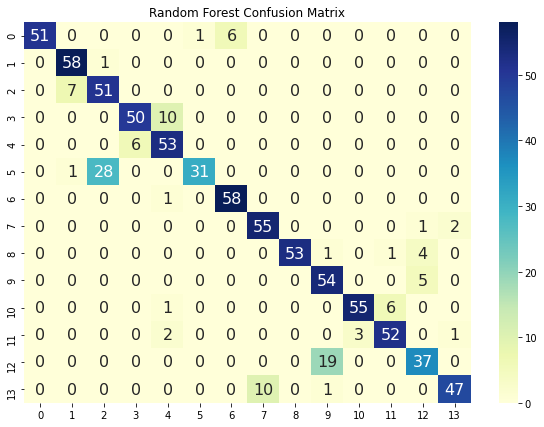

In [56]:
pred = rf.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('Random Forest Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})


### Saving the Model

In [60]:
import pickle

file = 'Final_RandomForest_Model.sav'
pickle.dump(rf, open(file, 'wb'))


### Loading the Model

In [68]:
loaded_model = pickle.load(open(file, 'rb'))

trainingScoring = loaded_model.score(X_test, y_test)
unseenScoring = loaded_model.score(X_unseen, Y_unseen)

print("This model scored ", 100*np.around(trainingScoring,decimals=2),"% on training")
print("This model scored ", 100*np.around(unseenScoring,decimals=2),"% on unseen data")


This model scored  97.0 % on training
This model scored  86.0 % on unseen data


### A comparison of the predictions next to their expected labels

In [88]:
ExamplesOfPredictions = loaded_model.predict(X_unseen)
ActualLabels = Y_unseen

zipped = zip(ExamplesOfPredictions, ActualLabels)

df = pd.DataFrame(zipped, columns = ['Prediction Made by classifier', 'Actual Label'])
df


,Prediction Made by classifier,Actual Label
0,LeftShake,LeftShake
1,LeftComeHere,LeftComeHere
2,LeftShake,LeftShake
3,RightZoomOut,RightZoomOut
4,LeftShake,LeftShake
...,...,...
818,LeftDrop,LeftDrop
819,LeftZoomInPalm,LeftZoomInPalm
820,LeftZoomOut,LeftZoomOut
821,LeftZoomOut,LeftZoomOut


In [94]:
(40.52+48.93+52.10+47.86+42.61)/5

46.40400000000001